# GMY Self-Objectification Analyses 5-14-20 
#### Annie Maheux

## Sections
### 1. Data architecture and variables
### 2. Self-objectification
##### (2.1) Mean self-objectification (SO) for all 7 gender groups
##### (2.2) Linear regression and ANOVA to assess group differences
##### (2.3) Multiple linear regression model, controlling for ethnicity and age
##### (2.4) Self-objectification by other gender breakdowns: binary identified groups and current gender identity
##### (2.5) Summary of self-objectification section
### 3. Self-objectification subscales
##### (3.1) SO subscale means for all 7 gender groups
##### (3.2) Linear regression: observer's perspective subscale
##### (3.3) Linear regression: body as self/importance of appearance subscale
##### (3.4) Summary of self-objectification subscales section
### 4. Body esteem and body esteem subscales
##### (4.1) Means for body esteem and body esteem subscales for all 7 gender groups
##### (4.2) Linear regression: BESAA total measure mean score 
##### (4.3) Linear regression: BESAA appearance subscale
##### (4.4) Linear regression: BESAA attribution subscale
##### (4.5) Linear regression: BESAA weight subscale
##### (4.6) Summary of BESAA and BESAA subscales section
### 5. Transpassing and self-objectification
##### (5.1) Transpassing descriptives
##### (5.2) Main effect of transpassing and worry about passing on SO
##### (5.3) Interactive effect of transpassing and gender on SO total scores
##### (5.4) Interactive effect of worry about passing and gender on SO total scores
##### (5.5) Interactive effect of transpassing/worry about passing and gender on SO subscales
##### (5.6) Summary of Transpassing and Self-objectification section
### 6. Overall Summary

## 1. Data architecture and variables

In [279]:
#load in data
dat <- read.csv("~/Github_Repo/dat.csv")
#see names of variables in dataset
names(dat)
#dimensions of dataframe (n, p)
dim(dat)

[1] "ID_number"                "Age"                     
 [3] "ethnicitOBC"              "SexualOrientation_new"   
 [5] "BiologicalSex"            "gender7"                 
 [7] "gender4"                  "gendernow"               
 [9] "cisboys"                  "cisgirls"                
[11] "transboys"                "transgirls"              
[13] "nonbinAMAB"               "nonbinAFAB"              
[15] "questioning"              "transAMAB"               
[17] "transAFAB"                "nowmale"                 
[19] "nowfemale"                "SOmean"                  
[21] "SOF1_obspers"             "SOF2_bodyself"           
[23] "BESAAmean"                "BESAAF1_appear"          
[25] "BESAAF2_attrib"           "BESAAF3_weigh"           
[27] "transpass_pass"           "transpass_worrypass"     
[29] "transpass_misgender"      "transpass_worrymisgender"
[31] "gender7new"               "gender4new"              
[33] "gendernownew"

[1] 3318   33

### Variables

#### Demographics 

'ID_number'

'Age' : numeric, range 14-18, mean = 15.9

'ethnicitOBC' : 1=white, 2=black and black mixed, 3=hispanic, 4=Asian/Pacific islander, 5=american indian, other, and mixed

'SexualOrientation_new': 1=hetero, 2=gay, lesbian, homosexual, 3=bi, 4=queer, 5=pan, 6=asexual, 7 = questioning/dont know, 8=other, 9 = do not want to respond

'BiologicalSex' : 1 = male, 2 = female, 3 = intersex

'gender7' and 'gender7new' : 1 = cisboys, 2 = cis girls, 3 = transboys, 4 = transgirls, 5 = nonbinary AFAB, 6 = nonbinary AMAB, 7 = questioning. ('new' version = character)


'gender4' and 'gender4new' : cis male = 1, cis female = 2, trans assigned male at birth (loosely, transfeminine spectrum) = 3, trans assigned female at birth (loosely, transmasculine spectrum) = 4. Questioning coded as missing. ('new' version = character)

'gendernow' and 'gendernownew': 1 = cis boys and trans boys, 2 = cis girls and trans girls, all else missing. ('new' version = character)


#### Outcomes / predictors
'SOmean': Mean of total SOBBS scale, range 1-5

'SOF1_obspers': Mean of SOBBS Factor 1 subscale: Internalization of an observer's perspective on the body, range 1-5

'SOF2_bodyself': Mean of SOBBS Factor 2 substace: Endorse idea that the body can represent the self and that how body looks is more important than what it can do, range 1-5

'BESAAmean': Body esteem total scale, range 1-5

'BESAAF1_appear': Body esteem factor 1 subscale: appearance concerns, range 1-5

'BESAAF2_attrib': Body esteem factor 2 subscale: appearance attributions, range 1-5

'BESAAF3_weigh': Body esteem factor 3 subscale: weight concerns/stigma, range 1-5

'transpass_pass': How often pass as true gender, Range 1-4: 1=Never 2=Sometimes	3=Often	4=Regularly

'transpass_worrypass': How often worry about passing as true gender, range 1-4

'transpass_misgender': How often get misgendered, range 1-4

'transpass_worrymisgender': How often worry about getting misgendered, range 1-4


## 2. Self-objectification







### (2.1) mean self-objectification (SO) for all 7 gender groups

(barplot shows standard errors for error bars)

gender7new,SelfObjMean,n
<fct>,<dbl>,<int>
cis boy,2.894531,256
cis girl,3.095640,711
nonbinary AFAB,3.011360,415
nonbinary AMAB,3.176385,49
questioning,3.237662,55
transboy,3.105247,678
transgirl,3.359127,72


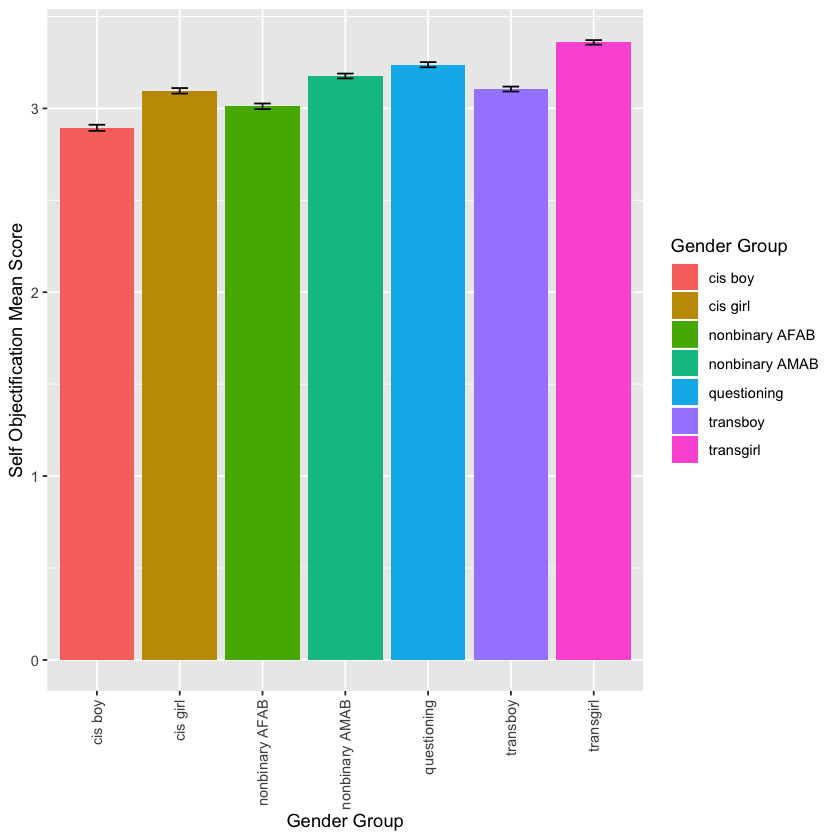

In [280]:
library(tidyverse)
#descriptives by gender7 for SOmean, omitting all missing on gender7 or SOmean
dat %>% select(gender7new, SOmean) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(SelfObjMean = mean(SOmean), n=n())

#create dataset with complete data for these analyses to get N (for the standard error calculation for the error bars)
dat %>% dplyr::select(gender7, SOmean) %>% na.omit() ->SOn


#barplot to visualize group differences
dat %>% select(gender7new, SOmean) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(SelfObjMean = mean(SOmean), SelfObjSE = (sd(SOmean)/sqrt(nrow(SOn)))) %>%
  ggplot(aes(x = gender7new, y=SelfObjMean, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=SelfObjMean-SelfObjSE, ymax=SelfObjMean+SelfObjSE), width=.2, position=position_dodge(.9)) +
  labs(y="Self Objectification Mean Score", x = "Gender Group", fill = "Gender Group") + 
 theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))



### (2.2) Linear regression and ANOVA to assess group differences

Gender groups dummy coded with cis boys as comparison

with Tukey HSD pairwise comparisons (the plot shows the 95% CI for any pairwise comparison; any line that does not cross 0 is significant at p = .05)



Call:
lm(formula = SOmean ~ gender7new, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.35913 -0.43993  0.03761  0.46618  2.10547 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.89453    0.04330  66.846  < 2e-16 ***
gender7newcis girl        0.20111    0.05050   3.982 7.04e-05 ***
gender7newnonbinary AFAB  0.11683    0.05506   2.122 0.033962 *  
gender7newnonbinary AMAB  0.28185    0.10803   2.609 0.009142 ** 
gender7newquestioning     0.34313    0.10297   3.332 0.000875 ***
gender7newtransboy        0.21072    0.05082   4.146 3.51e-05 ***
gender7newtransgirl       0.46460    0.09242   5.027 5.38e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6928 on 2229 degrees of freedom
  (1082 observations deleted due to missingness)
Multiple R-squared:  0.01719,	Adjusted R-squared:  0.01454 
F-statistic: 6.496 on 6 and 2229 DF,  p-value: 8.29e-07


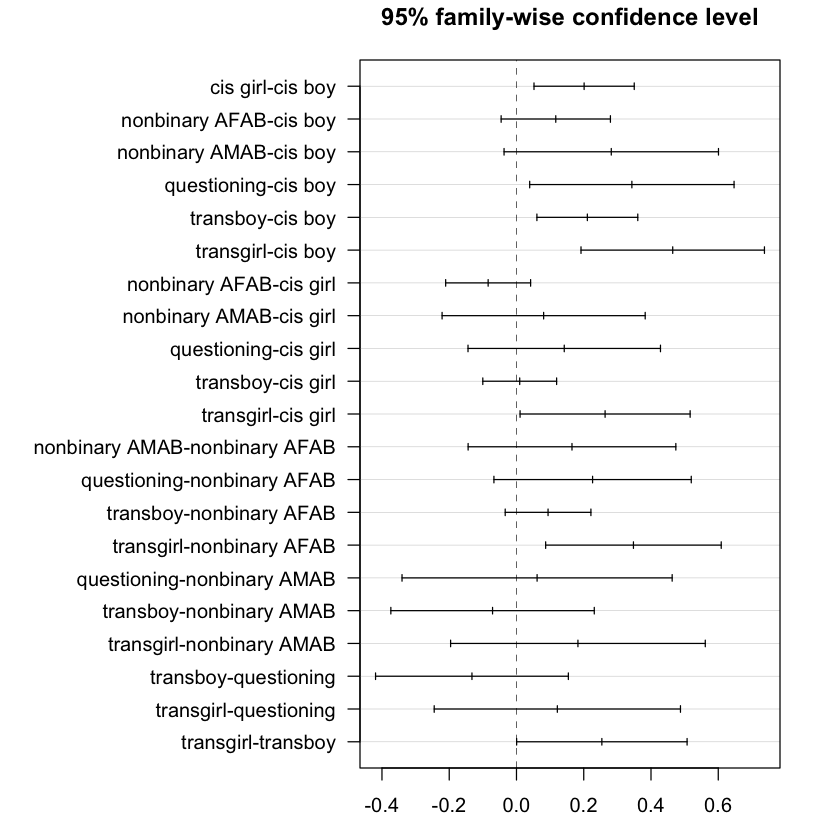

In [281]:
#regression/ANOVA
model1 <- lm(SOmean ~ gender7new, data=dat)
summary(model1)
ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphical parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)

### (2.3) Multiple linear regression model, controlling for ethnicity and age


In [282]:
#Adjusted for race/ethnicity and Age
dat$ethnicitOBC <- as.factor(dat$ethnicitOBC)
model2 <- lm(SOmean ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model2)


Call:
lm(formula = SOmean ~ gender7new + ethnicitOBC + Age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36561 -0.42603  0.01728  0.45722  2.10736 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.255187   0.208875  15.584  < 2e-16 ***
gender7newcis girl        0.198906   0.050686   3.924 8.96e-05 ***
gender7newnonbinary AFAB  0.116187   0.055276   2.102  0.03567 *  
gender7newnonbinary AMAB  0.284418   0.108175   2.629  0.00862 ** 
gender7newquestioning     0.332018   0.103076   3.221  0.00130 ** 
gender7newtransboy        0.210267   0.051003   4.123 3.88e-05 ***
gender7newtransgirl       0.472965   0.092572   5.109 3.51e-07 ***
ethnicitOBC2             -0.033185   0.053461  -0.621  0.53484    
ethnicitOBC3              0.106489   0.051980   2.049  0.04061 *  
ethnicitOBC4             -0.137699   0.076738  -1.794  0.07288 .  
ethnicitOBC5             -0.005059   0.044550  -0.114  0.90961    
Age 

gender4new,SelfObjMean,n
<fct>,<dbl>,<int>
cis boy,2.894531,256
cis girl,3.095640,711
trans AFAB,3.069599,1093
trans AMAB,3.285124,121


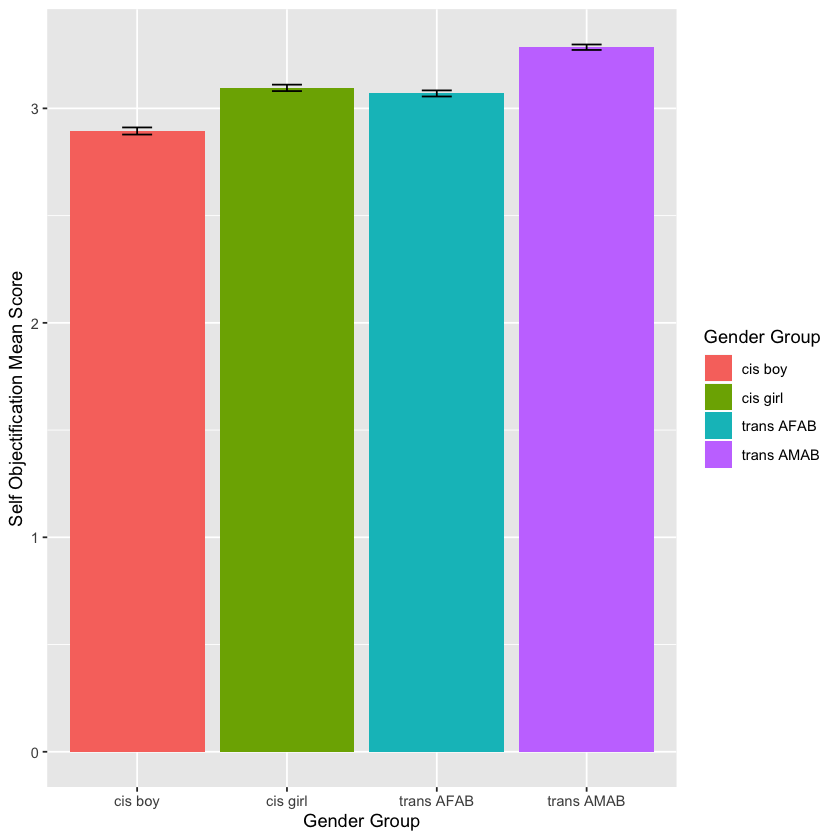

In [283]:
dat %>% select(gender4new, SOmean) %>% na.omit() %>%
  group_by(gender4new) %>% summarize(SelfObjMean = mean(SOmean), n=n())

dat %>% select(gender4new, SOmean) %>% na.omit() %>%
  group_by(gender4new) %>% summarize(SelfObjMean = mean(SOmean), SelfObjSE = (sd(SOmean)/sqrt(nrow(SOn)))) %>%
  ggplot(aes(x = gender4new, y=SelfObjMean, fill = gender4new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=SelfObjMean-SelfObjSE, ymax=SelfObjMean+SelfObjSE), width=.2, position=position_dodge(.9)) +
  labs(y="Self Objectification Mean Score", x = "Gender Group", fill = "Gender Group")

gendernownew,SelfObjMean,n
<fct>,<dbl>,<int>
cis boy and trans boy,3.047492,934
cis girl and trans girl,3.119869,783



Call:
lm(formula = SOmean ~ gendernownew + ethnicitOBC + Age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.23646 -0.43243  0.02598  0.46732  1.94252 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          3.44440    0.23612  14.587   <2e-16 ***
gendernownewcis girl and trans girl  0.07081    0.03374   2.099   0.0360 *  
ethnicitOBC2                        -0.07173    0.06023  -1.191   0.2338    
ethnicitOBC3                         0.10817    0.05737   1.885   0.0596 .  
ethnicitOBC4                        -0.17845    0.08209  -2.174   0.0299 *  
ethnicitOBC5                        -0.06079    0.05205  -1.168   0.2430    
Age                                 -0.02418    0.01467  -1.648   0.0994 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6911 on 1708 degrees of freedom
  (1603 observations deleted due to missingness)
Multiple R-squ

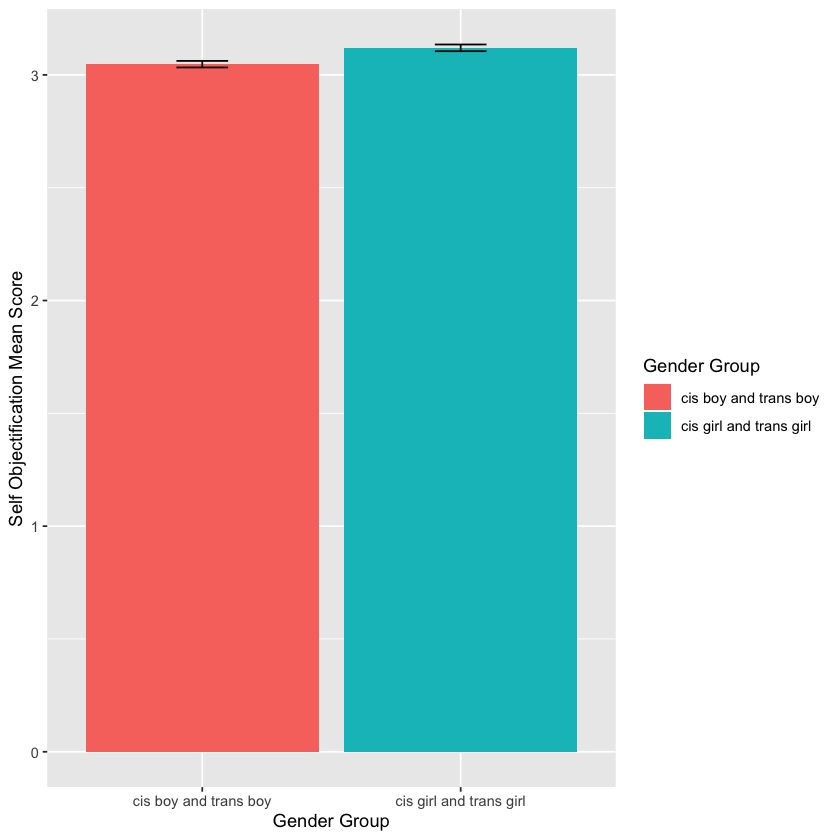

In [284]:
dat %>% select(gendernownew, SOmean) %>% na.omit() %>%
  group_by(gendernownew) %>% summarize(SelfObjMean = mean(SOmean), n=n())

dat %>% select(gendernownew, SOmean) %>% na.omit() %>%
  group_by(gendernownew) %>% summarize(SelfObjMean = mean(SOmean), SelfObjSE = (sd(SOmean)/sqrt(nrow(SOn)))) %>%
  ggplot(aes(x = gendernownew, y=SelfObjMean, fill = gendernownew)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=SelfObjMean-SelfObjSE, ymax=SelfObjMean+SelfObjSE), width=.2, position=position_dodge(.9)) +
  labs(y="Self Objectification Mean Score", x = "Gender Group", fill = "Gender Group")

model1 <- lm(SOmean~gendernownew + ethnicitOBC + Age, data=dat)
summary(model1)

### (2.5) Summary of self-objectification section

Trans youth assigned male at birth (loosely, transfeminine spectrum) experience the highest mean levels of SO when looking at binary identified transgirls (who report the highest out of all 7 groups) and collapsing across trans kids AMAB. Pairwise, transgirls report higher SO than transboys and nonbinary youth AFAB. No differences between cis girls and transboys or nonbinary youth AFAB. When collapsing groups across current gender identity (transgirls and cis girls vs. transboys and cis boys), those identified as female report significantly higher SO than those identified as male.

## 3. Self-Objectification Subscales

Subscale 1: Internalizing an observer's perspective on the body

Subscale 2: Belief that body represents the self (appearance more important than what the body can do)

### (3.1)  SO subscale means for all 7 gender groups

In [285]:
dat %>% select(gender7new, SOF1_obspers, SOF2_bodyself) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(Subscale1_ObsPers = mean(SOF1_obspers), Subscale2_BodySelf = mean(SOF2_bodyself), n=n())

gender7new,Subscale1_ObsPers,Subscale2_BodySelf,n
<fct>,<dbl>,<dbl>,<int>
cis boy,3.483817,2.305246,256
cis girl,3.866988,2.324292,711
nonbinary AFAB,3.849225,2.173494,415
nonbinary AMAB,4.026239,2.326531,49
questioning,4.077922,2.397403,55
transboy,4.001896,2.208597,678
transgirl,4.134921,2.583333,72


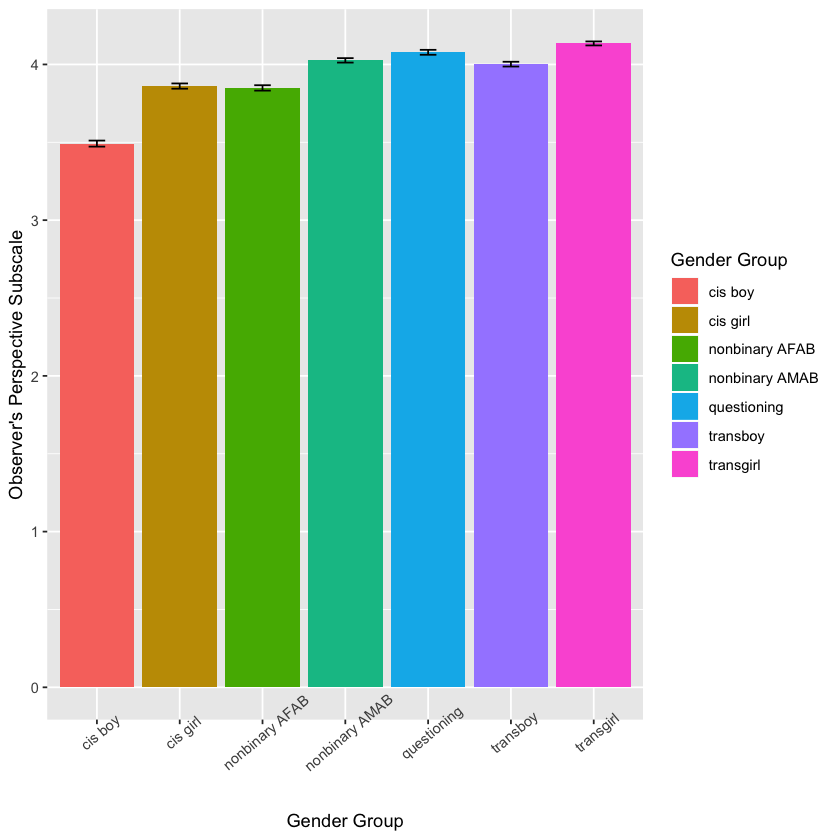

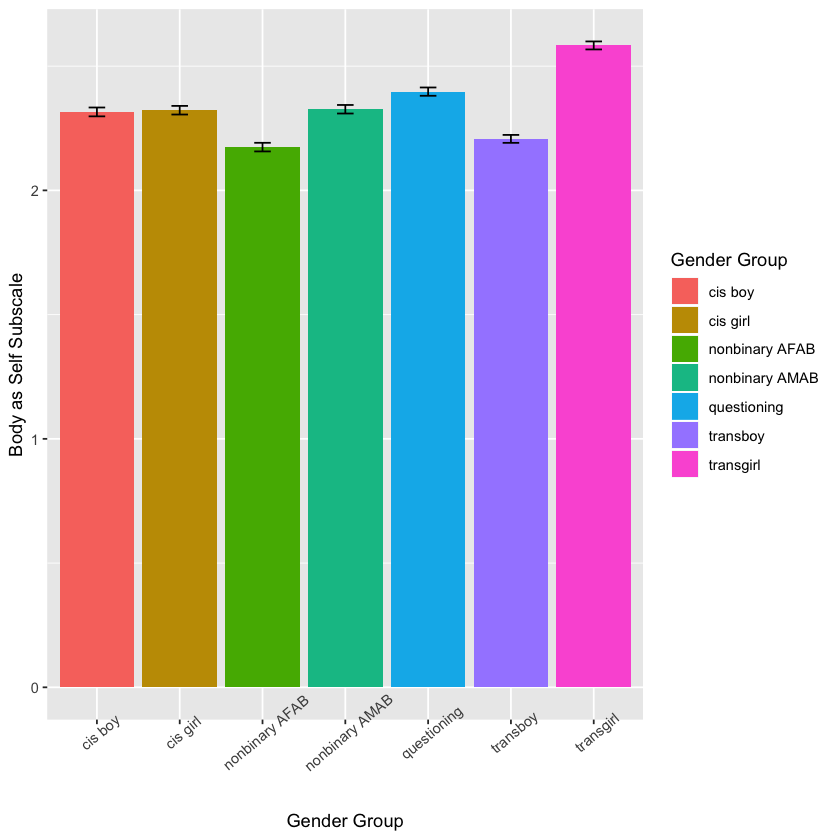

In [286]:
dat %>% select(gender7new, SOF1_obspers) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(SelfObjMean = mean(SOF1_obspers), SelfObjSE = (sd(SOF1_obspers)/sqrt(nrow(SOn)))) %>%
  ggplot(aes(x = gender7new, y=SelfObjMean, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=SelfObjMean-SelfObjSE, ymax=SelfObjMean+SelfObjSE), width=.2, position=position_dodge(.9)) +
  labs(y="Observer's Perspective Subscale", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))

dat %>% select(gender7new, SOF2_bodyself) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(SelfObjMean = mean(SOF2_bodyself), SelfObjSE = (sd(SOF2_bodyself)/sqrt(nrow(SOn)))) %>%
  ggplot(aes(x = gender7new, y=SelfObjMean, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=SelfObjMean-SelfObjSE, ymax=SelfObjMean+SelfObjSE), width=.2, position=position_dodge(.9)) +
  labs(y="Body as Self Subscale", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))

### (3.2) Linear regression: observer's perspective subscale

First unadjusted, then with race and age as covariates


Call:
lm(formula = SOF1_obspers ~ gender7new, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1349 -0.4305  0.1389  0.5695  1.5083 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.49169    0.04898  71.293  < 2e-16 ***
gender7newcis girl        0.36944    0.05712   6.467 1.22e-10 ***
gender7newnonbinary AFAB  0.35753    0.06237   5.732 1.12e-08 ***
gender7newnonbinary AMAB  0.53454    0.12259   4.360 1.36e-05 ***
gender7newquestioning     0.58623    0.11684   5.017 5.65e-07 ***
gender7newtransboy        0.51020    0.05755   8.866  < 2e-16 ***
gender7newtransgirl       0.64323    0.10485   6.135 1.01e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7867 on 2236 degrees of freedom
  (1075 observations deleted due to missingness)
Multiple R-squared:  0.03988,	Adjusted R-squared:  0.03731 
F-statistic: 15.48 on 6 and 2236 DF,  p-value: < 2.2e-16


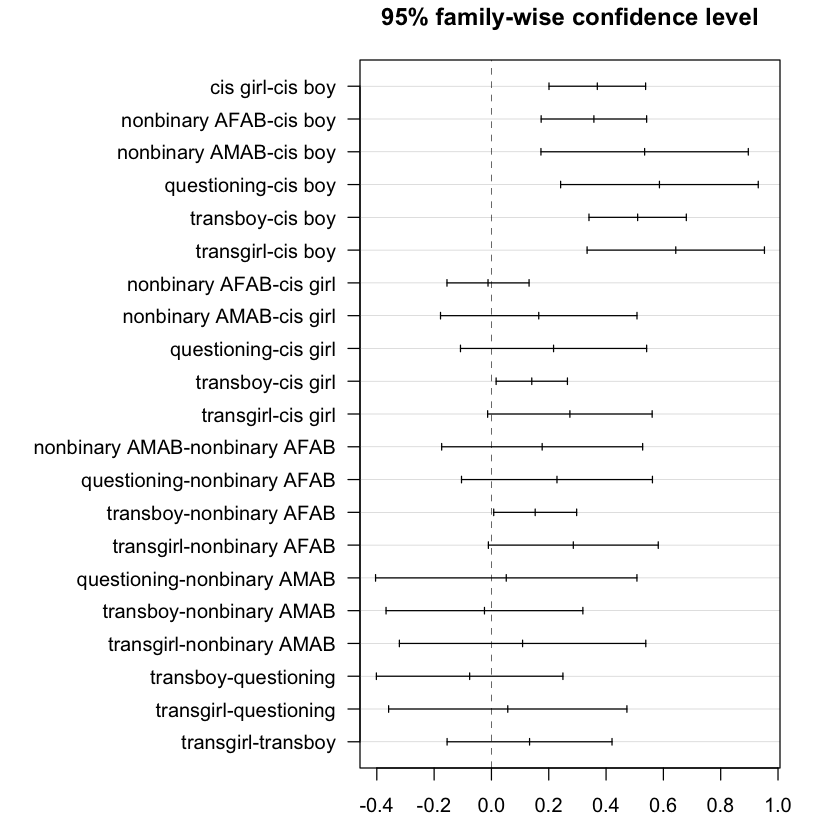

In [287]:
#unadjusted model
model1 <- lm(SOF1_obspers ~ gender7new, data=dat)
summary(model1)
ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)

In [288]:
#adjusted model
model1 <- lm(SOF1_obspers ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model1)


Call:
lm(formula = SOF1_obspers ~ gender7new + ethnicitOBC + Age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1464 -0.4006  0.1166  0.5622  1.5645 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.688342   0.236969  15.565  < 2e-16 ***
gender7newcis girl        0.370897   0.057350   6.467 1.22e-10 ***
gender7newnonbinary AFAB  0.349077   0.062628   5.574 2.79e-08 ***
gender7newnonbinary AMAB  0.530451   0.122788   4.320 1.63e-05 ***
gender7newquestioning     0.581053   0.116994   4.967 7.33e-07 ***
gender7newtransboy        0.503624   0.057765   8.718  < 2e-16 ***
gender7newtransgirl       0.639545   0.105055   6.088 1.34e-09 ***
ethnicitOBC2             -0.094919   0.060587  -1.567  0.11734    
ethnicitOBC3              0.034189   0.058914   0.580  0.56176    
ethnicitOBC4             -0.225531   0.087157  -2.588  0.00973 ** 
ethnicitOBC5              0.008438   0.050299   0.168  0.86680    
Age     

### (3.3) Linear regression: body as self/importance of appearance subscale

First adjusted, then with Age and race as covariates


Call:
lm(formula = SOF2_bodyself ~ gender7new, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5833 -0.6083 -0.0644  0.5345  2.6843 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.315731   0.049993  46.321   <2e-16 ***
gender7newcis girl        0.006895   0.058279   0.118   0.9058    
gender7newnonbinary AFAB -0.141624   0.063588  -2.227   0.0260 *  
gender7newnonbinary AMAB  0.010800   0.124932   0.086   0.9311    
gender7newquestioning     0.081672   0.119071   0.686   0.4928    
gender7newtransboy       -0.108473   0.058673  -1.849   0.0646 .  
gender7newtransgirl       0.267602   0.106867   2.504   0.0123 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8015 on 2239 degrees of freedom
  (1072 observations deleted due to missingness)
Multiple R-squared:  0.01178,	Adjusted R-squared:  0.009132 
F-statistic: 4.448 on 6 and 2239 DF,  p-value: 0.0001753


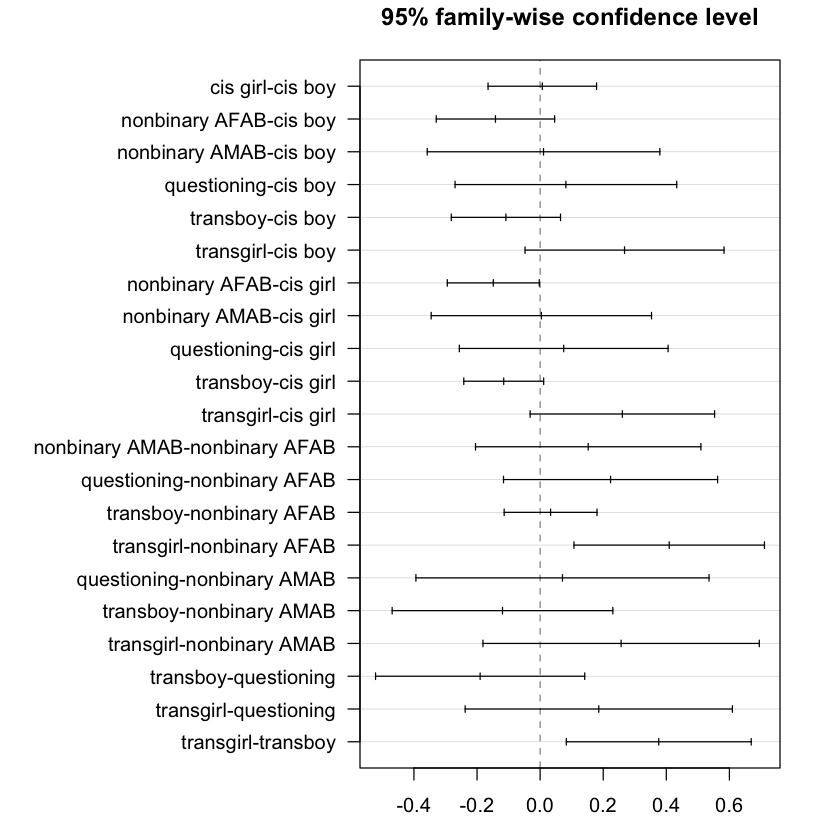

In [289]:
#unadjusted model
model1 <- lm(SOF2_bodyself ~ gender7new, data=dat)
summary(model1)
ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)


In [290]:
#adjusted model
model1 <- lm(SOF2_bodyself ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model1)


Call:
lm(formula = SOF2_bodyself ~ gender7new + ethnicitOBC + Age, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58651 -0.58482 -0.08892  0.53013  2.76307 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.862439   0.240811  11.887  < 2e-16 ***
gender7newcis girl        0.000378   0.058463   0.006  0.99484    
gender7newnonbinary AFAB -0.133742   0.063817  -2.096  0.03622 *  
gender7newnonbinary AMAB  0.022368   0.125036   0.179  0.85804    
gender7newquestioning     0.064699   0.119125   0.543  0.58710    
gender7newtransboy       -0.101995   0.058862  -1.733  0.08327 .  
gender7newtransgirl       0.288178   0.106984   2.694  0.00712 ** 
ethnicitOBC2              0.028110   0.061524   0.457  0.64779    
ethnicitOBC3              0.163649   0.059960   2.729  0.00640 ** 
ethnicitOBC4             -0.020071   0.088251  -0.227  0.82011    
ethnicitOBC5             -0.031492   0.051419  -0.612  0.54

### (3.4) Summary of self-objectification subscales section

Interestingly, the internalization of an observer's perspective is high for all GMY (and cis girls) with no differences among these groups, but the idea that the body can represent the self is much higher among transgirls than transboys and nonbinary youth AFAB. The idea that the body can represent the self is also higher among transgirls compared to cis girls, but does not quite reach significance.

## 4. Body Esteem and body esteem subscales

### (4.1) mean body esteem and body esteem subscales for all 7 gender groups
(barplot shows standard errors for error bars)

In [291]:
#descriptives by gender7 for BESAA total and all factors, omitting all missing on any items
dat %>% select(gender7new, BESAAmean, BESAAF1_appear, BESAAF2_attrib, BESAAF3_weigh) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(BESAAtotal = mean(BESAAmean), F1_appearance=mean(BESAAF1_appear),
                                     F2_attributions = mean(BESAAF2_attrib), F3_weight = mean(BESAAF3_weigh), n=n())


gender7new,BESAAtotal,F1_appearance,F2_attributions,F3_weight,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
cis boy,3.029508,2.831148,2.796721,3.241803,305
cis girl,2.665671,2.568957,2.750711,2.695794,844
nonbinary AFAB,2.400654,2.365971,2.599582,2.404228,479
nonbinary AMAB,2.435573,2.290909,2.683636,2.543182,55
questioning,2.065574,2.029508,2.275410,2.180328,61
transboy,2.252626,2.137273,2.551429,2.351299,770
transgirl,2.179560,1.976623,2.537662,2.482143,77


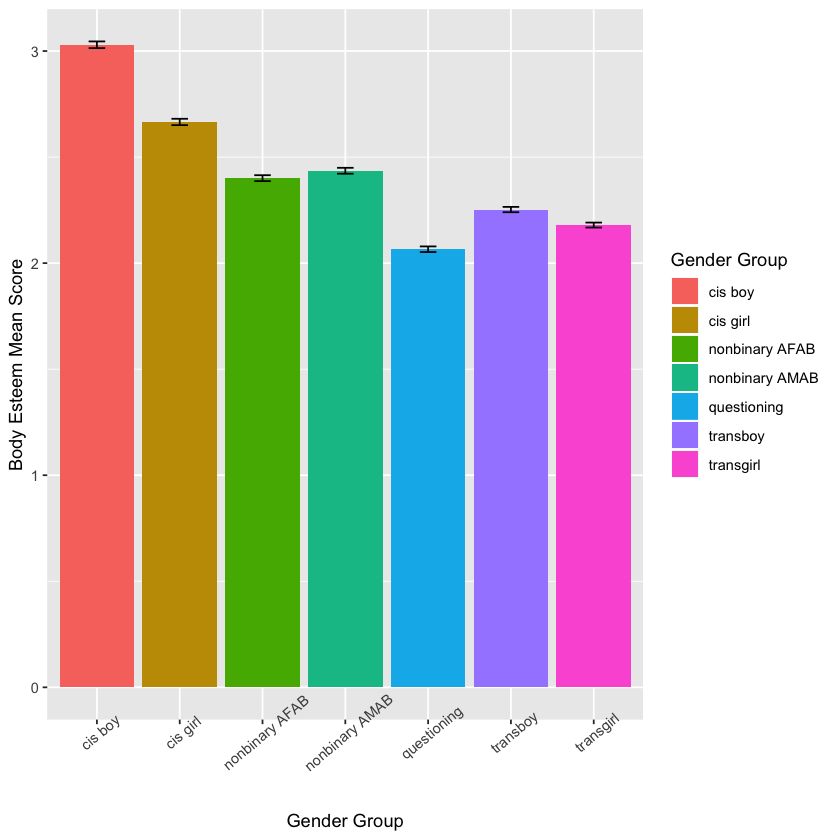

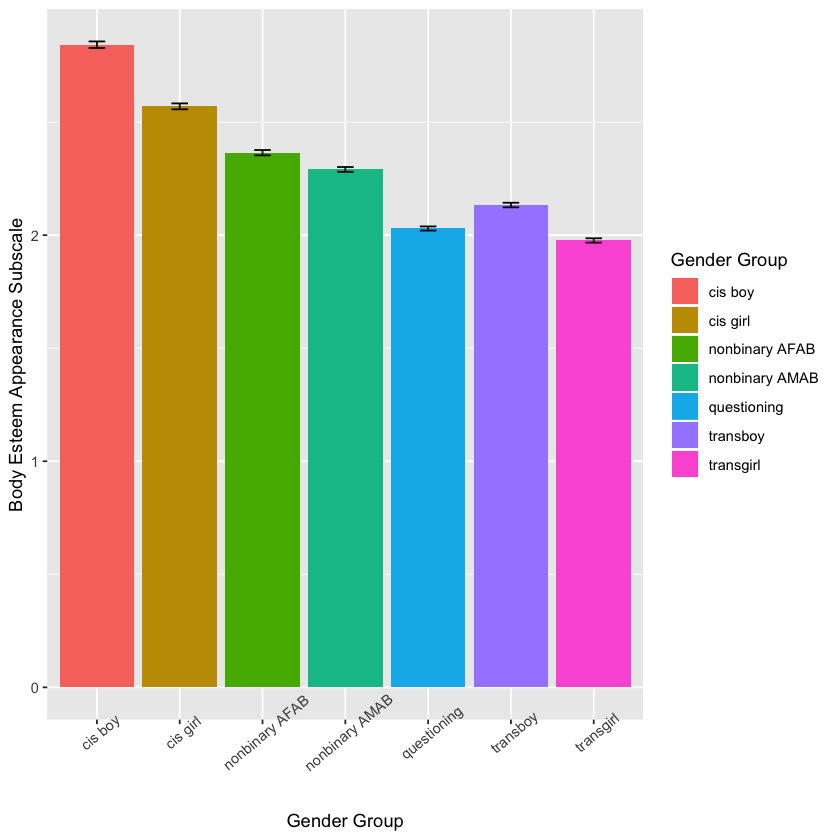

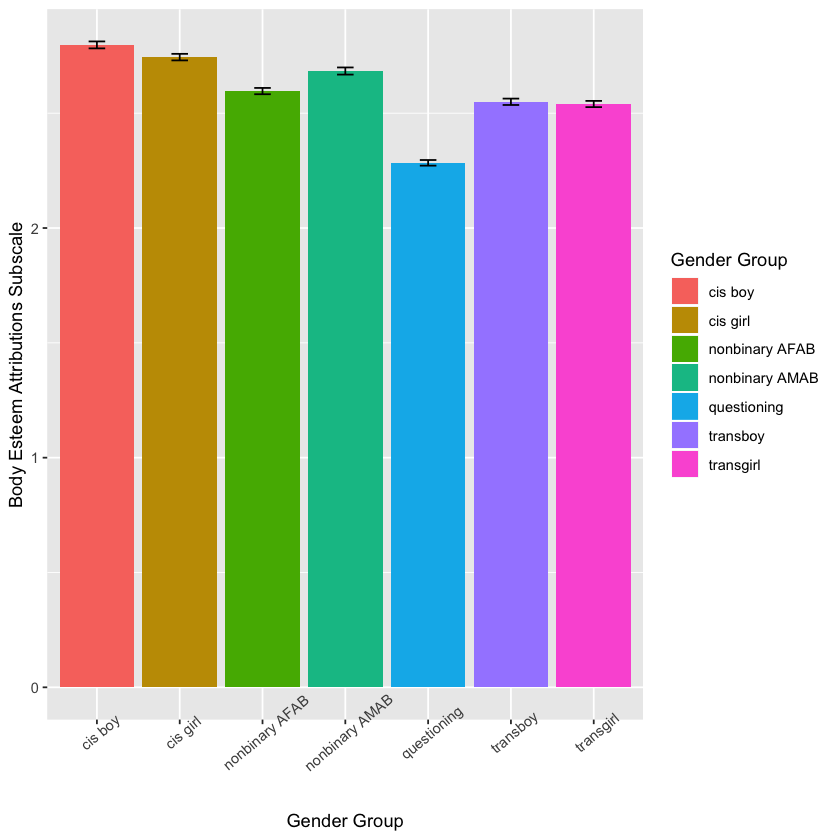

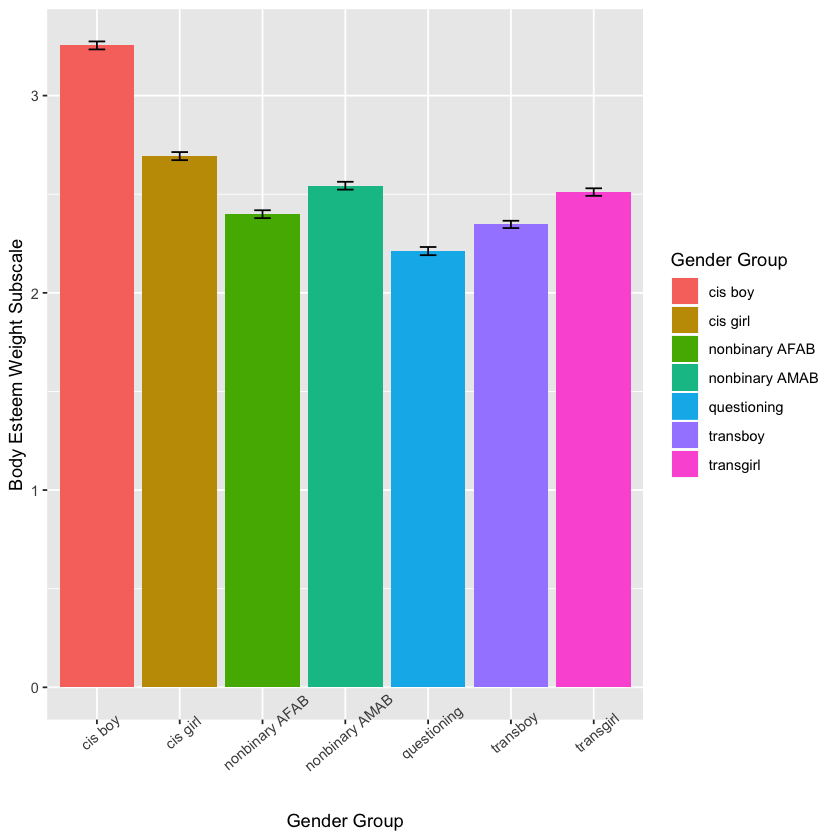

In [292]:
#create dataset with complete data for these analyses to get N (for the standard error calculation for the error bars)
dat %>% dplyr::select(gender7new, BESAAmean, BESAAF1_appear, BESAAF2_attrib, BESAAF3_weigh) %>% na.omit() ->BESAAn

#barplot to visualize group differences
dat %>% select(gender7new, BESAAmean) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(BESAAtotal = mean(BESAAmean), BESAASE = (sd(BESAAmean)/sqrt(nrow(BESAAn)))) %>%
  ggplot(aes(x = gender7new, y=BESAAtotal, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=BESAAtotal-BESAASE, ymax=BESAAtotal+BESAASE), width=.2, position=position_dodge(.9)) +
  labs(y="Body Esteem Mean Score", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))

dat %>% select(gender7new, BESAAF1_appear) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(BESAA = mean(BESAAF1_appear), BESAASE = (sd(BESAAF1_appear)/sqrt(nrow(BESAAn)))) %>%
  ggplot(aes(x = gender7new, y=BESAA, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=BESAA-BESAASE, ymax=BESAA+BESAASE), width=.2, position=position_dodge(.9)) +
  labs(y="Body Esteem Appearance Subscale", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))

dat %>% select(gender7new, BESAAF2_attrib) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(BESAA = mean(BESAAF2_attrib), BESAASE = (sd(BESAAF2_attrib)/sqrt(nrow(BESAAn)))) %>%
  ggplot(aes(x = gender7new, y=BESAA, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=BESAA-BESAASE, ymax=BESAA+BESAASE), width=.2, position=position_dodge(.9)) +
  labs(y="Body Esteem Attributions Subscale", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))

dat %>% select(gender7new, BESAAF3_weigh) %>% na.omit() %>%
  group_by(gender7new) %>% summarize(BESAA = mean(BESAAF3_weigh), BESAASE = (sd(BESAAF3_weigh)/sqrt(nrow(BESAAn)))) %>%
  ggplot(aes(x = gender7new, y=BESAA, fill = gender7new)) +
  geom_bar(stat="identity") + 
  geom_errorbar(aes(ymin=BESAA-BESAASE, ymax=BESAA+BESAASE), width=.2, position=position_dodge(.9)) +
  labs(y="Body Esteem Weight Subscale", x = "Gender Group", fill = "Gender Group") + theme(axis.text.x = element_text(angle = 40))



### (4.2) linear regression: BESAA total measure mean score 
by gender groups, then adjusted for race/ethnicity and age


Call:
lm(formula = BESAAmean ~ gender7new, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.89907 -0.51350 -0.03523  0.51032  2.17312 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.02951    0.04101  73.878  < 2e-16 ***
gender7newcis girl       -0.36384    0.04785  -7.604 3.98e-14 ***
gender7newnonbinary AFAB -0.62885    0.05246 -11.987  < 2e-16 ***
gender7newnonbinary AMAB -0.59394    0.10491  -5.661 1.67e-08 ***
gender7newquestioning    -0.96393    0.10045  -9.597  < 2e-16 ***
gender7newtransboy       -0.77688    0.04845 -16.034  < 2e-16 ***
gender7newtransgirl      -0.84995    0.09134  -9.306  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7162 on 2584 degrees of freedom
  (727 observations deleted due to missingness)
Multiple R-squared:  0.1197,	Adjusted R-squared:  0.1176 
F-statistic: 58.54 on 6 and 2584 DF,  p-value: < 2.2e-16


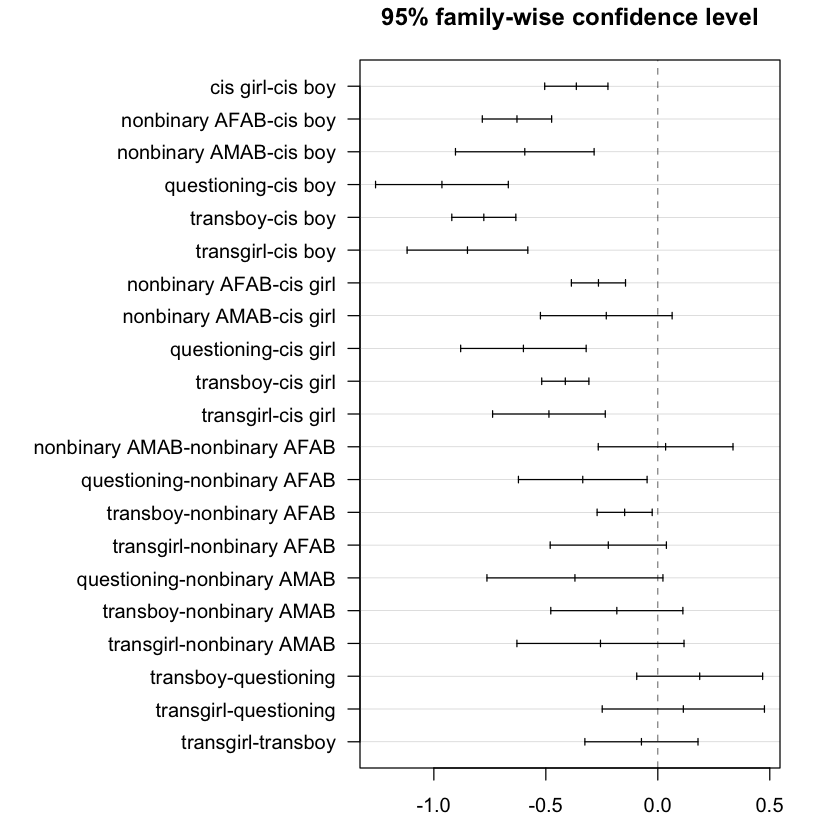

In [293]:
#unadjusted model
model1 <- lm(BESAAmean ~ gender7new, data=dat)
summary(model1)

ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)



In [294]:
#adjusted model
model1 <- lm(BESAAmean ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model1)


Call:
lm(formula = BESAAmean ~ gender7new + ethnicitOBC + Age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93502 -0.51820 -0.04468  0.50413  2.20454 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.752183   0.199318  13.808  < 2e-16 ***
gender7newcis girl       -0.366514   0.047909  -7.650 2.81e-14 ***
gender7newnonbinary AFAB -0.636414   0.052545 -12.112  < 2e-16 ***
gender7newnonbinary AMAB -0.606016   0.104914  -5.776 8.55e-09 ***
gender7newquestioning    -0.960319   0.100403  -9.565  < 2e-16 ***
gender7newtransboy       -0.784671   0.048524 -16.171  < 2e-16 ***
gender7newtransgirl      -0.863363   0.091322  -9.454  < 2e-16 ***
ethnicitOBC2              0.020867   0.050957   0.409  0.68221    
ethnicitOBC3             -0.148353   0.050063  -2.963  0.00307 ** 
ethnicitOBC4              0.034210   0.075350   0.454  0.64985    
ethnicitOBC5              0.002124   0.042638   0.050  0.96027    
A

### (4.3) linear regression: BESAA appearance subscale

unadjusted, then adjusted for race/ethnicity and age


Call:
lm(formula = BESAAF1_appear ~ gender7new, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.54244 -0.46488 -0.06488  0.40909  1.96671 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.84244    0.03474  81.817  < 2e-16 ***
gender7newcis girl       -0.27271    0.04055  -6.726 2.13e-11 ***
gender7newnonbinary AFAB -0.47757    0.04453 -10.726  < 2e-16 ***
gender7newnonbinary AMAB -0.55153    0.08962  -6.154 8.71e-10 ***
gender7newquestioning    -0.81294    0.08579  -9.475  < 2e-16 ***
gender7newtransboy       -0.70915    0.04110 -17.253  < 2e-16 ***
gender7newtransgirl      -0.86582    0.07799 -11.102  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6127 on 2618 degrees of freedom
  (693 observations deleted due to missingness)
Multiple R-squared:  0.1433,	Adjusted R-squared:  0.1413 
F-statistic: 72.99 on 6 and 2618 DF,  p-value: < 2.2e-16


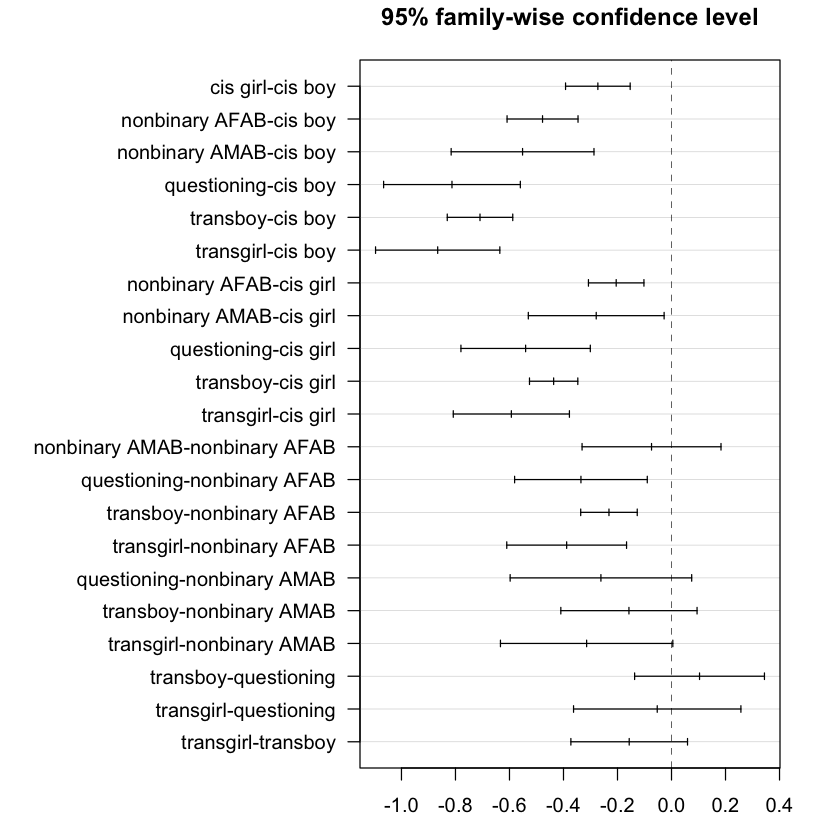

In [295]:
#un adjusted model
model1 <- lm(BESAAF1_appear ~ gender7new, data=dat)
summary(model1)

ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)


In [296]:
#adjusted model
model2 <- lm(BESAAF1_appear ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model2)


Call:
lm(formula = BESAAF1_appear ~ gender7new + ethnicitOBC + Age, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52880 -0.44961 -0.05329  0.41099  1.92402 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.484451   0.168854  14.714  < 2e-16 ***
gender7newcis girl       -0.275266   0.040615  -6.777 1.51e-11 ***
gender7newnonbinary AFAB -0.485093   0.044612 -10.874  < 2e-16 ***
gender7newnonbinary AMAB -0.567868   0.089587  -6.339 2.72e-10 ***
gender7newquestioning    -0.810579   0.085716  -9.457  < 2e-16 ***
gender7newtransboy       -0.716981   0.041184 -17.409  < 2e-16 ***
gender7newtransgirl      -0.877322   0.077943 -11.256  < 2e-16 ***
ethnicitOBC2              0.058299   0.043375   1.344   0.1790    
ethnicitOBC3             -0.087880   0.042303  -2.077   0.0379 *  
ethnicitOBC4              0.003922   0.063464   0.062   0.9507    
ethnicitOBC5              0.044516   0.036367   1.224   0.

### (4.4) linear regression: BESAA attribution subscale

unadjusted, then adjusted for race/ethnicity and age


Call:
lm(formula = BESAAF2_attrib ~ gender7new, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7974 -0.5442  0.0037  0.4558  2.4503 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.79739    0.04108  68.092  < 2e-16 ***
gender7newcis girl       -0.05320    0.04784  -1.112 0.266190    
gender7newnonbinary AFAB -0.20108    0.05242  -3.836 0.000128 ***
gender7newnonbinary AMAB -0.11375    0.10525  -1.081 0.279915    
gender7newquestioning    -0.51351    0.10009  -5.131 3.10e-07 ***
gender7newtransboy       -0.24770    0.04842  -5.116 3.34e-07 ***
gender7newtransgirl      -0.25739    0.09024  -2.852 0.004376 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7187 on 2630 degrees of freedom
  (681 observations deleted due to missingness)
Multiple R-squared:  0.02366,	Adjusted R-squared:  0.02143 
F-statistic: 10.62 on 6 and 2630 DF,  p-value: 1.095e-11


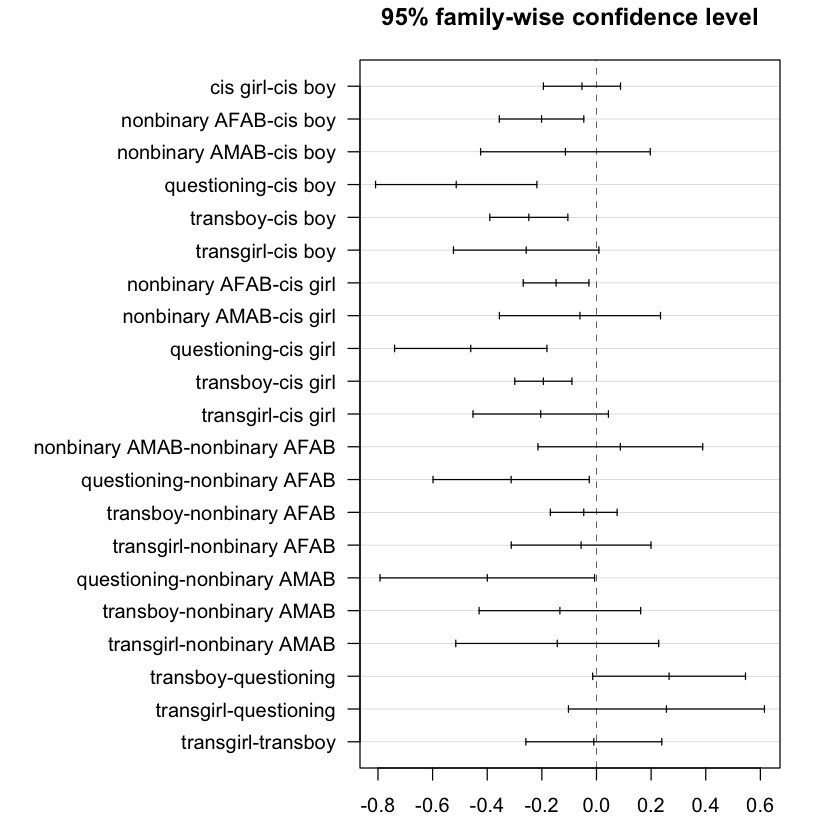

In [297]:
#unadjusted model
model1 <- lm(BESAAF2_attrib ~ gender7new, data=dat)
summary(model1)

ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)




In [298]:
#adjusted model
model2 <- lm(BESAAF2_attrib ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model2)


Call:
lm(formula = BESAAF2_attrib ~ gender7new + ethnicitOBC + Age, 
    data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84080 -0.50094 -0.01082  0.46050  2.43780 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.238139   0.197945  11.307  < 2e-16 ***
gender7newcis girl       -0.051892   0.047894  -1.083  0.27869    
gender7newnonbinary AFAB -0.209149   0.052497  -3.984 6.96e-05 ***
gender7newnonbinary AMAB -0.130997   0.105240  -1.245  0.21333    
gender7newquestioning    -0.502571   0.100044  -5.023 5.41e-07 ***
gender7newtransboy       -0.257771   0.048470  -5.318 1.14e-07 ***
gender7newtransgirl      -0.274205   0.090232  -3.039  0.00240 ** 
ethnicitOBC2             -0.003441   0.050882  -0.068  0.94609    
ethnicitOBC3             -0.104227   0.049610  -2.101  0.03574 *  
ethnicitOBC4             -0.064937   0.074800  -0.868  0.38540    
ethnicitOBC5             -0.011877   0.042451  -0.280  0.7

### (4.5) linear regression: BESAA weight subscale

unadjusted, then adjusted for race/ethnicity and age


Call:
lm(formula = BESAAF3_weigh ~ gender7new, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.25442 -0.84692 -0.09692  0.80679  2.53831 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.25442    0.05700  57.098  < 2e-16 ***
gender7newcis girl       -0.56121    0.06646  -8.445  < 2e-16 ***
gender7newnonbinary AFAB -0.85566    0.07305 -11.714  < 2e-16 ***
gender7newnonbinary AMAB -0.71124    0.14703  -4.837 1.39e-06 ***
gender7newquestioning    -1.04273    0.13980  -7.459 1.18e-13 ***
gender7newtransboy       -0.90750    0.06742 -13.460  < 2e-16 ***
gender7newtransgirl      -0.74348    0.12601  -5.900 4.09e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 2629 degrees of freedom
  (682 observations deleted due to missingness)
Multiple R-squared:  0.07636,	Adjusted R-squared:  0.07426 
F-statistic: 36.23 on 6 and 2629 DF,  p-value: < 2.2e-16


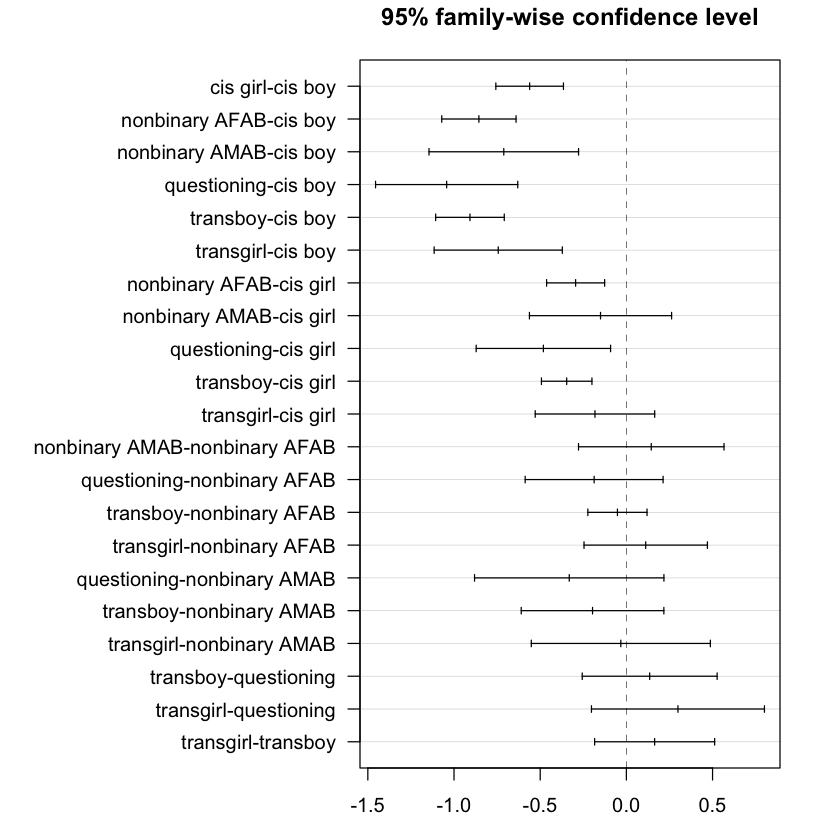

In [299]:
#unadjusted model
model1 <- lm(BESAAF3_weigh ~ gender7new, data=dat)
summary(model1)

ANOVA=aov(model1)
#TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
TUKEY = TukeyHSD(x=ANOVA, 'gender7new', conf.level=0.95)
#change the graphicap parameters
old.par <- par(mai=c(.6,3,.5,.5))
plot(TUKEY, las=1)


In [300]:
#adjusted model
model4 <- lm(BESAAF3_weigh ~ gender7new + ethnicitOBC + Age, data=dat)
summary(model4)


Call:
lm(formula = BESAAF3_weigh ~ gender7new + ethnicitOBC + Age, 
    data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2971 -0.8519 -0.1054  0.7837  2.5481 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.441879   0.276531  12.447  < 2e-16 ***
gender7newcis girl       -0.570161   0.066637  -8.556  < 2e-16 ***
gender7newnonbinary AFAB -0.865133   0.073250 -11.811  < 2e-16 ***
gender7newnonbinary AMAB -0.715093   0.147107  -4.861 1.24e-06 ***
gender7newquestioning    -1.048434   0.139818  -7.499 8.78e-14 ***
gender7newtransboy       -0.915215   0.067607 -13.537  < 2e-16 ***
gender7newtransgirl      -0.755714   0.126075  -5.994 2.33e-09 ***
ethnicitOBC2             -0.010956   0.070942  -0.154  0.87728    
ethnicitOBC3             -0.220367   0.069427  -3.174  0.00152 ** 
ethnicitOBC4              0.092106   0.104190   0.884  0.37676    
ethnicitOBC5             -0.064133   0.059479  -1.078  0.28102    
Ag

### (4.6) Summary of BESAA and BESAA subscales section

All groups show worse overall body esteem than cis boys. All gender minority groups except nonbinary AMAB report worse overall body esteem than cis girls. Within the GMY groups, those who are questioning and transgirls report worse body esteem than nonbinary AFAB adolescents.

For the appearance subscale, all groups report worse appearance-related body esteem than cis boys and girls. Within GMY groups, questioning, transboys, and transgirls report worse appearance-related body esteem than nonbinary AFAB.

For the attribution subscale, some similar patterns exist though the magnitude of difference is generally smaller (potentially suggesting that GMY recognize that their concern with their appearance is something they feel rather than something they think other people think?). Notably, all GMY groups report worse attribution-related body esteem than cis boys and cis girls, except for transgirls and nonbinary AMAB (suggesting that living one's early life socialized as male leads to beliefs that others feel positively about one's appearance? Or perhaps just confidence in others' attributions of the self?). For this subscale, cis girls do not differ from cis boys. Kids who are questioning report worse attribution-related body esteem than nonbinary AMAB or AFAB adolescents. No other differences among GMY groups.

For the weight subscale, a slightly different pattern emerges. All groups report worse weight esteem than cis boys. GMY groups report worse weight esteem than cis girls except for transgirls and nonbinary AMAB (so all AMAB GMY), potentially suggesting that living through early life as male has some protective effect on weight stigma that is exacerbated for those who grow up socialized as female but then go through a gender transition. No significant differences are observed among GMY.

Although the questioning group is small so results should be interpreted with caution, it is interesting to note that this group has consistently poor body esteem across these subscales, perhaps because it is related with feelings of identity confusion or internalized negativity.

## 5. Transpassing and Self-objectification

I will only use the passing and worry about passing variables, but pattern of results are similar for the misgender variables, though more robust for the passing variables.

A reminder that the transpassing variables (including misgendering) are:

'transpass_pass': How often pass as true gender, Range 1-4: 1=Never 2=Sometimes 3=Often 4=Regularly

'transpass_worrypass': How often worry about passing as true gender, range 1-4

'transpass_misgender': How often get misgendered, range 1-4

'transpass_worrymisgender': How often worry about getting misgendered, range 1-4

##### (5.1) Transpassing descriptives

In [301]:

###create dichotomized variables for comparisons of interest
#0 = transboy, 1 = transgirl
dat$transboy_transgirl <- car::recode(dat$gender7, "1=99; 2=99; 3=0; 4=1; 5=99; 6=99; 7=99")
dat %>% naniar::replace_with_na(replace = list(transboy_transgirl=99)) ->dat
#0 = nonbinary AMAB, 1 = nonbinary AFAB
dat$nonbin_AMorFB <- car::recode(dat$gender7, "1=99; 2=99; 3=99; 4=99; 5=1; 6=0; 7=99")
dat %>% naniar::replace_with_na(replace = list(nonbin_AMorFB=99)) ->dat
#   dat$gendernow
#0 = trans AMAB, 1 = trans AFAB
dat$trans_AMorFB<- car::recode(dat$gender7, "1=99; 2=99; 3=1; 4=0; 5=1; 6=0; 7=99")
dat %>% naniar::replace_with_na(replace = list(trans_AMorFB=99)) ->dat

In [302]:
dat %>% select(gender7new, transpass_pass, transpass_worrypass, transpass_misgender, transpass_worrymisgender) %>%
  na.omit() %>% subset(gender7new!='cis girl' & gender7new!='cis boy') %>% group_by(gender7new) %>% summarize(HowOftenPass = mean(transpass_pass),
                                        HowOftenWorryPass = mean(transpass_worrypass),
                                        HowOftenMisgendered = mean(transpass_misgender),
                                        HowOftenWorryMisgendered = mean(transpass_worrymisgender), n = n())

gender7new,HowOftenPass,HowOftenWorryPass,HowOftenMisgendered,HowOftenWorryMisgendered,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
nonbinary AFAB,1.958498,2.770751,3.221344,2.766798,506
nonbinary AMAB,1.892857,2.803571,3.035714,2.696429,56
questioning,2.290323,2.048387,2.258065,1.806452,62
transboy,2.279268,3.508537,3.287805,3.503659,820
transgirl,1.843373,3.240964,3.457831,3.361446,83


### (5.2) Main effect of transpassing on SO

NOTE: I removed this section because the main effects are included in interactive models, below. Generally, passing more is associated with less SO (but the cross-over interaction by gender in the later models makes this moot) and worry about passing is associated with more SO.


Code organized by: 

First SO mean, then subscale 1, then subscale 2 regressed on HOW OFTEN pass; each model unadjusted then adjusted for race and age

Then SO mean, then subscale 1, then subscale 2 regressed on WORRY about passing; each model unadjusted then adjusted for race and age

In [303]:
#SO total scale mean score and how often pass
#model1 <- lm(SOmean~transpass_pass + ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOmean~transpass_misgender+ ethnicitOBC + Age, data=dat)
#summary(model1)

In [304]:
#SO factor 1: internalize observers perspective and how often pass
#model1 <- lm(SOF1_obspers~transpass_pass+ ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOF1_obspers~transpass_misgender+ ethnicitOBC + Age, data=dat)
#summary(model1)

In [305]:
#SO factor 2: body as self and how often pass
#model1 <- lm(SOF2_bodyself~transpass_pass+ ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOF2_bodyself~transpass_misgender+ ethnicitOBC + Age, data=dat)
#summary(model1)


In [306]:
#SO total mean and how often WORRY about passing
#model1 <- lm(SOmean~transpass_worrypass + ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOmean~transpass_worrymisgender+ ethnicitOBC + Age, data=dat)
#summary(model1)


In [307]:
#SO factor 1: internalize observers perspective and how often WORRY about passing
#model1 <- lm(SOF1_obspers~transpass_worrypass+ ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOF1_obspers~transpass_worrymisgender+ ethnicitOBC + Age, data=dat)
#summary(model1)


In [308]:
#SO factor 2: body as self and how often WORRY about passing
#model1 <- lm(SOF2_bodyself~transpass_worrypass+ ethnicitOBC + Age, data=dat)
#summary(model1)

#model1 <- lm(SOF2_bodyself~transpass_worrymisgender+ ethnicitOBC + Age, data=dat)
#summary(model1)

### (5.3) Interactive effect of transpassing and gender on SO total scores

Interaction between how often pass and binary identified trans girl vs. trans boy:


Call:
lm(formula = SOmean ~ transpass_pass * transboy_transgirl, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36992 -0.41334  0.01523  0.43662  1.95817 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        3.284849   0.066174  49.640  < 2e-16 ***
transpass_pass                    -0.078612   0.026979  -2.914  0.00368 ** 
transboy_transgirl                -0.001272   0.190517  -0.007  0.99468    
transpass_pass:transboy_transgirl  0.121783   0.096784   1.258  0.20868    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.627 on 746 degrees of freedom
  (2568 observations deleted due to missingness)
Multiple R-squared:  0.02532,	Adjusted R-squared:  0.0214 
F-statistic:  6.46 on 3 and 746 DF,  p-value: 0.0002553


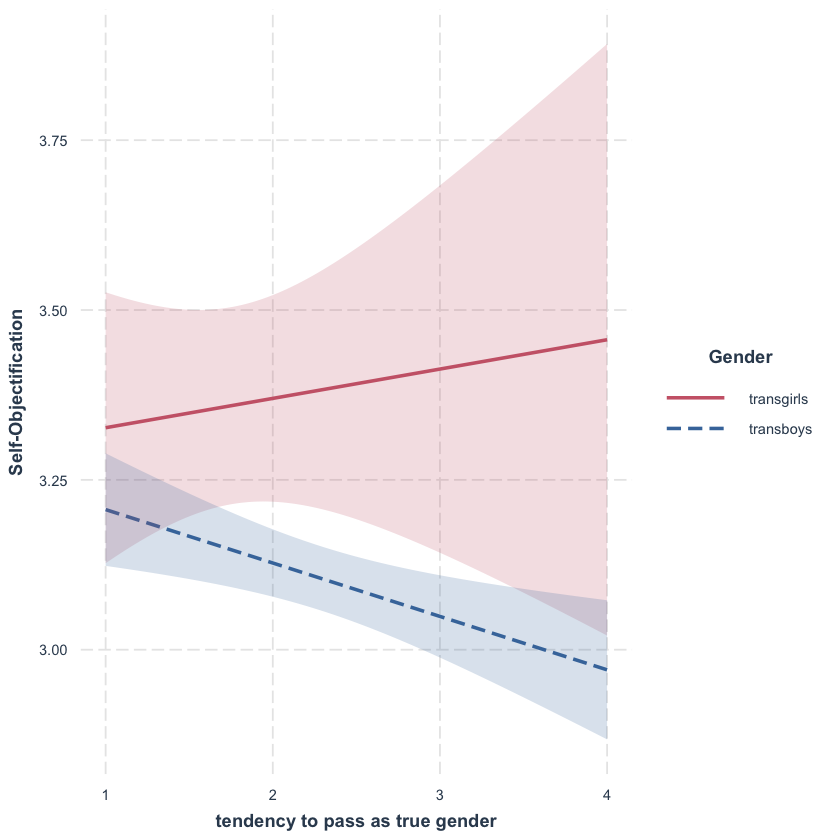

In [309]:
library(jtools)
library(interactions)

model1 <- lm(SOmean~transpass_pass*transboy_transgirl, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_pass, modx=transboy_transgirl, colors="Qual3", 
              interval=TRUE, x.label="tendency to pass as true gender", 
              y.label = "Self-Objectification", legend.main = "Gender", modx.labels = c("transboys", "transgirls"))



Interaction between how often pass and any gender minority youth assigned male at birth vs. female:


Call:
lm(formula = SOmean ~ transpass_pass * trans_AMorFB, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29725 -0.42624  0.00233  0.43090  1.97305 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  3.16388    0.14925  21.198   <2e-16 ***
transpass_pass               0.06668    0.07509   0.888    0.375    
trans_AMorFB                 0.03832    0.15829   0.242    0.809    
transpass_pass:trans_AMorFB -0.12835    0.07842  -1.637    0.102    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6632 on 1209 degrees of freedom
  (2105 observations deleted due to missingness)
Multiple R-squared:  0.01609,	Adjusted R-squared:  0.01365 
F-statistic: 6.591 on 3 and 1209 DF,  p-value: 0.0002034


Warning message:
“transpass_pass and trans_AMorFB are not included in an interaction with one
another in the model.”
Warning message:
“Johnson-Neyman intervals are not available for factor moderators.”


ERROR: Error in names(x) <- value: 'names' attribute [7] must be the same length as the vector [0]


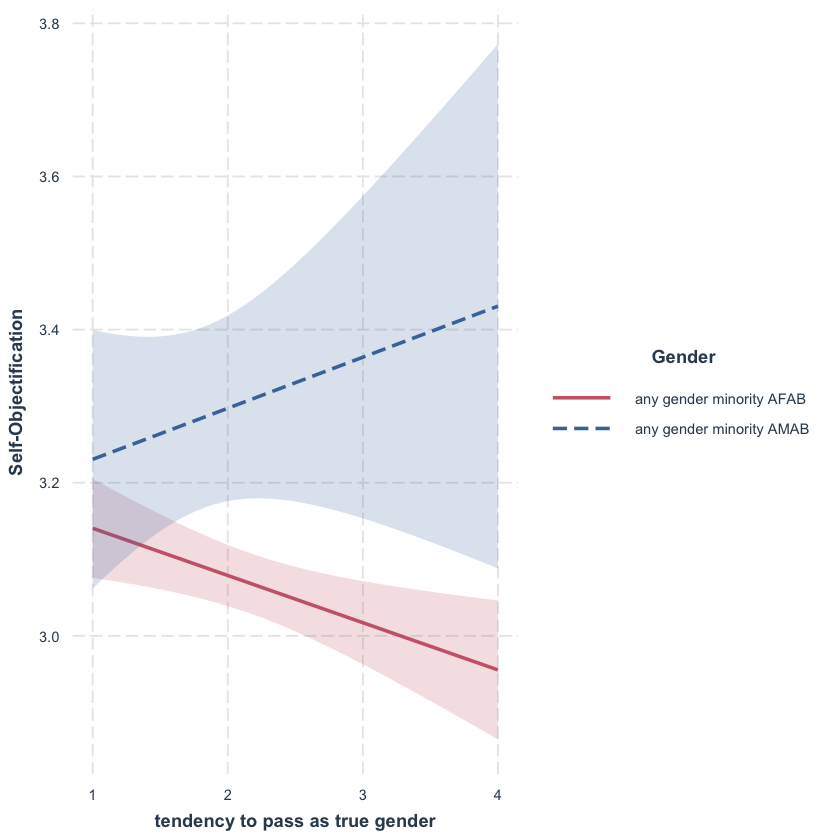

In [310]:
model2 <- lm(SOmean~transpass_pass*trans_AMorFB, data=dat)
summary(model2)
interact_plot(model2, pred=transpass_pass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="tendency to pass as true gender", 
              y.label = "Self-Objectification", legend.main = "Gender", modx.labels = c("any gender minority AMAB", "any gender minority AFAB"))



library(interactions)
sim_slopes(model1, pred=transpass_pass, modx=trans_AMorFB)

### (5.4) Interactive effect of worry about passing and gender on SO total scores
Interaction between how often WORRY about passing and binary identified trans girl vs. trans boy:

In [ ]:
model1 <- lm(SOmean~transpass_worrypass*transboy_transgirl, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_worrypass, modx=transboy_transgirl, colors="Qual3", 
              interval=TRUE, x.label="Worry about passing as true gender", 
              y.label = "Self-Objectification", legend.main = "Gender", modx.labels = c("transboys", "transgirls"))


Interaction between how often WORRY about passing and any gender minority youth assigned male at birth vs. female:

In [ ]:

model1 <- lm(SOmean~transpass_worrypass*trans_AMorFB, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_worrypass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="Worry about passing as true gender", 
              y.label = "Self-Objectification", legend.main = "Gender", modx.labels = c("any GMY AMAB", "any GMY AFAB"))



### (5.5) Interactive effect of transpassing/worry about passing and gender on SO subscales

In this section I just look at comparisons across all GMY youth assigned male or female at birth (so transboys and nonbinary AFAB together, transgirls and nonbinary AMAB together) for parsimony.

SOBBS subscale 1 regressed on interaction between how often pass and any GMY AFAB vs AMAB:

In [ ]:
#Factor 1
model1 <- lm(SOF1_obspers~transpass_pass*trans_AMorFB, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_pass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="tendency to pass as true gender", 
              y.label = "Internalization of observer's perspective", legend.main = "Gender", modx.labels = c("trans AMAB", "trans AFAB"))


SOBBS subscale 1 (observer's perspective) regressed on interaction between how often WORRY about passing and any GMY AFAB vs. AMAB:

In [ ]:
model1 <- lm(SOF1_obspers~transpass_worrypass*trans_AMorFB, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_worrypass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="Worry about passing as true gender", 
              y.label = "Internalization of observer's perspective", legend.main = "Gender", modx.labels = c("trans AMAB", "trans AFAB"))


SOBBS Subscale 2 (body as self) regressed on interaction between how often pass and any GMY AFAB vs AMAB:

In [ ]:
model1 <- lm(SOF2_bodyself~transpass_pass*trans_AMorFB, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_pass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="tendency to pass as true gender", 
              y.label = "Internalization of idea that body can represent the self", legend.main = "Gender", modx.labels = c("trans AMAB", "trans AFAB"))


library(interactions)
sim_slopes(model1, pred=transpass_pass, modx=trans_AMorFB)

SOBBS Subscale 2 (body as self) regressed on interaction between how often WORRY about passing and any GMY AFAB vs. AMAB:

In [ ]:
model1 <- lm(SOF2_bodyself~transpass_worrypass*trans_AMorFB, data=dat)
summary(model1)
interact_plot(model1, pred=transpass_worrypass, modx=trans_AMorFB, colors="Qual3", 
              interval=TRUE, x.label="Worry about passing as true gender", 
              y.label = "Internalization of idea that body can represent the self", legend.main = "Gender", modx.labels = c("trans AMAB", "trans AFAB"))


### (5.6) Summary of Transpassing and Self-objectification section

As we have already discussed as a group there is an interesting difference in self-objectification by gender group for those who feel they do or do not pass often. For binary identified transgirls vs. binary identified transboys AND when collapsing across GMY AMAB vs. AFAB, passing more often is associated with greater SO, suggesting that presenting to the world as female is linked with greater self-objectification. In turn, passing more often for GMY AFAB is associated with lesser SO, suggesting that presenting to the world as a male is linked to less self-objectification.

Notably, this interaction approached but did not reach significance with the way I coded gender groups here (in the prior analysis it was significant, so will need to look closer at what is going on here if we use these analyses for the paper). However, the positive association between SO and passing among those AMAB only was not quite significant (p = .12), though the negative association between SO and passing among those AFAB was significant. These findings may be due to the smaller sample size of AMAB adolescents.

For worry about passing, as before, there is no interaction by gender: those who worry more about passing self-objectify more (potentially reflecting the tendency to take on an observer's perspective or engage in what Social Psychology calls "objectified self-awareness", rather than experience the full range of self-objectifying beliefs and behaviors as it was described in the original framework).

In terms of the subscales, there is another interesting difference by internalization of an observer's perspective (subscale 1) and the idea that the body represents the self (subscale 2). The findings from these subscales support the assertions made from the analyses with the SOBBS mean score. 

There is no interaction by gender and passing tendency for subscale 1 nor is there a main effect: how often one passes does not relate to their tendency to internalize an observer's perspective. However, worrying about passing is very strongly associated with subscale 2 for both gender groups. 

For subscale 2 the gender by passing interaction becomes significant: transgirls who pass often endorse more strongly the idea that the body can represent the self (or that appearance is more important than how the body feels/what it can does). Although not quite significant (p = .10), the slope is reversed for transboys, such that passing more is negatively associated with the idea that the body can represent the self/believing that appearance is most important. In regards to worry about passing, again there is no gender interaction: worry about passing is positively associated with the body as self subscale (although not as strongly as with the observer's perspective subscale).



 ## 6. Overall Summary
 Note that this is the same as the summaries above, just combined and stored in one place for easy access.
 
 
#### Summary of self-objectification subscales section

Interestingly, the internalization of an observer's perspective is high for all GMY (and cis girls) with no differences among these groups, but the idea that the body can represent the self is much higher among transgirls than transboys and nonbinary youth AFAB. The idea that the body can represent the self is also higher among transgirls compared to cis girls, but does not quite reach significance.


#### Summary of BESAA and BESAA subscales section

All groups show worse overall body esteem than cis boys. All gender minority groups except nonbinary AMAB report worse overall body esteem than cis girls. Within the GMY groups, those who are questioning and transgirls report worse body esteem than nonbinary AFAB adolescents.

For the appearance subscale, all groups report worse appearance-related body esteem than cis boys and girls. Within GMY groups, questioning, transboys, and transgirls report worse appearance-related body esteem than nonbinary AFAB.

For the attribution subscale, some similar patterns exist though the magnitude of difference is generally smaller (potentially suggesting that GMY recognize that their concern with their appearance is something they feel rather than something they think other people think?). Notably, all GMY groups report worse attribution-related body esteem than cis boys and cis girls, except for transgirls and nonbinary AMAB (suggesting that living one's early life socialized as male leads to beliefs that others feel positively about one's appearance? Or perhaps just confidence in others' attributions of the self?). For this subscale, cis girls do not differ from cis boys. Kids who are questioning report worse attribution-related body esteem than nonbinary AMAB or AFAB adolescents. No other differences among GMY groups.

For the weight subscale, a slightly different pattern emerges. All groups report worse weight esteem than cis boys. GMY groups report worse weight esteem than cis girls except for transgirls and nonbinary AMAB (so all AMAB GMY), potentially suggesting that living through early life as male has some protective effect on weight stigma that is exacerbated for those who grow up socialized as female but then go through a gender transition. No significant differences are observed among GMY.

Although the questioning group is small so results should be interpreted with caution, it is interesting to note that this group has consistently poor body esteem across these subscales, perhaps because it is related with feelings of identity confusion or internalized negativity.

#### Summary of Transpassing and Self-objectification section

As we have already discussed as a group there is an interesting difference in self-objectification by gender group for those who feel they do or do not pass often. For binary identified transgirls vs. binary identified transboys AND when collapsing across GMY AMAB vs. AFAB, passing more often is associated with greater SO, suggesting that presenting to the world as female is linked with greater self-objectification. In turn, passing more often for GMY AFAB is associated with lesser SO, suggesting that presenting to the world as a male is linked to less self-objectification.

Notably, this interaction approached but did not reach significance with the way I coded gender groups here (in the prior analysis it was significant, so will need to look closer at what is going on here if we use these analyses for the paper). However, the positive association between SO and passing among those AMAB only was not quite significant (p = .12), though the negative association between SO and passing among those AFAB was significant. These findings may be due to the smaller sample size of AMAB adolescents.

For worry about passing, as before, there is no interaction by gender: those who worry more about passing self-objectify more (potentially reflecting the tendency to take on an observer's perspective or engage in what Social Psychology calls "objectified self-awareness", rather than experience the full range of self-objectifying beliefs and behaviors as it was described in the original framework).

In terms of the subscales, there is another interesting difference by internalization of an observer's perspective (subscale 1) and the idea that the body represents the self (subscale 2). The findings from these subscales support the assertions made from the analyses with the SOBBS mean score. 

There is no interaction by gender and passing tendency for subscale 1 nor is there a main effect: how often one passes does not relate to their tendency to internalize an observer's perspective. However, worrying about passing is very strongly associated with subscale 2 for both gender groups. 

For subscale 2 the gender by passing interaction becomes significant: transgirls who pass often endorse more strongly the idea that the body can represent the self (or that appearance is more important than how the body feels/what it can does). Although not quite significant (p = .10), the slope is reversed for transboys, such that passing more is negatively associated with the idea that the body can represent the self/believing that appearance is most important. In regards to worry about passing, again there is no gender interaction: worry about passing is positively associated with the body as self subscale (although not as strongly as with the observer's perspective subscale).